# Machine learning for medicine
## Linear Regression

## Overview
Linear regression is a more advanced way to figure out if variables are 'correlated' (see [Correlation notebook]()).
But it's also so much more.
In this notebook we get hands on with understanding linear regression before running through an example.
Most critically, the code here is setup to be friendly to *put your own Discovery data* in and maybe find interesting patterns worth further study.

### Code Setup

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stats
from example_systems import *

## Linear Regression
We'll start with the example we worked within the [Correlation notebook]().

In [3]:
interact(simple_eg,slope=(-5,5,0.1),noise=(0.0,10.0,0.5),samples=fixed(100));

interactive(children=(FloatSlider(value=1.0, description='slope', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

Linear regression boils down to us trying to figure out the number we're choosing for our 'slope', *using only the blue datapoints*.

We're going to perform a linear regression on the *blue* datapoints.
Importantly, we generated the blue datapoint using a linear equation so we can actually assess how well our linear regression performed in bringing us to the truth.

First, let's set the 'Truth' by defining what the slope is.

In [45]:
set_slope = widgets.Text('0.2')
display(set_slope)

Text(value='0.2')

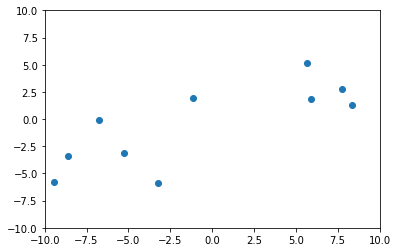

In [69]:
x,y = gen_lin_data(float(set_slope.value),3.0,10)
plt.figure()
plt.scatter(x,y)
plt.xlim((-10,10));
plt.ylim((-10,10));

In [70]:
from sklearn.linear_model import LinearRegression
x = x.reshape(-1,1)
y = y.reshape(-1,1)
reg = LinearRegression().fit(x, y)
reg.score(x, y)

slope_estimate = reg.coef_[0,0]
print('Regression slope is ' + str(slope_estimate))
#reg.intercept_

Regression slope is 0.42042156950468645


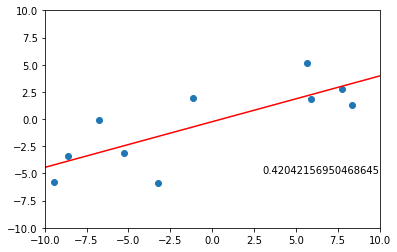

In [73]:
plt.scatter(x,y)
x_fix = np.linspace(-10,10,100)
plt.plot(x_fix,slope_estimate * x_fix + reg.intercept_,'red')
plt.text(3,-5,str(slope_estimate))
plt.xlim((-10,10));
plt.ylim((-10,10));

## More advanced Linear Regression
Where Linear Regression really shines is when we have way more than just two variables.